not done

In [56]:
import numpy as np
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
class Reseau_neurone:
    def __init__(self, dimension):
        self.dictio = {}
        for i in range(1, len(dimension)):
            # Initialiser les poids en utilisant des valeurs aléatoires, avec la forme (out, in)
            self.dictio['w'+str(i)] = np.random.randn(dimension[i], dimension[i-1]) * np.sqrt(2 / dimension[i-1])  # Initialisation He
            self.dictio['b'+str(i)] = np.zeros((dimension[i], 1))  # Le biais est initialisé à zéro
    def forward(self, X, dropout_rate=0.5):
        self.activation = {'A0': X}
        num_layers = len(self.dictio) // 2
        for i in range(1, num_layers+1):
            self.Z = np.dot(self.dictio['w'+str(i)], self.activation['A'+str(i-1)]) + self.dictio['b'+str(i)]
            if i == num_layers:
                expZ = np.exp(self.Z - np.max(self.Z, axis=0, keepdims=True)) # Pour la stabilité numérique
                self.activation['A'+str(i)] = expZ / np.sum(expZ, axis=0, keepdims=True)
            else:
                self.activation['A'+str(i)] = 1 / (1 + np.exp(-self.Z))  # Activation Sigmoid
                if i < num_layers:
                    # Appliquer le dropout
                    mask = np.random.binomial(1, 1 - dropout_rate, size=self.activation['A'+str(i)].shape)
                    self.activation['A'+str(i)] *= mask


    def back(self, y):
        m = y.shape[1]
        c = len(self.dictio) // 2
        self.grad = {}
        
        # Calculer la dérivée de la fonction de perte par rapport à la couche de sortie
        dZ = self.activation['A'+str(c)] - y
        
        for i in reversed(range(1, c+1)):
            self.grad["dw"+str(i)] = (1/m) * np.dot(dZ, self.activation['A'+str(i-1)].T)
            self.grad["db"+str(i)] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
            if i > 1:
                dZ = np.dot(self.dictio['w'+str(i)].T, dZ) * (self.activation['A'+str(i-1)] * (1 - self.activation['A'+str(i-1)]))

    def loss(self, y):
        c = len(self.dictio) // 2
        m = y.shape[1]
        # Calculer la perte de l'entropie croisée binaire
        A_final = self.activation['A'+str(c)]
        self.L = -(1/m) * np.sum(y * np.log(A_final + 1e-8) + (1 - y) * np.log(1 - A_final + 1e-8))

    def up(self, rate):
        c = len(self.dictio) // 2
        for i in range(1, c+1):
            self.dictio['w'+str(i)] -= rate * self.grad["dw"+str(i)]
            self.dictio['b'+str(i)] -= rate * self.grad["db"+str(i)]

    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            self.forward(X)
            self.back(y)
            self.loss(y)
            self.up(learning_rate)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {self.L}")

    def score(self, X, y):
        c = len(self.dictio) // 2
        self.forward(X)
        # Appliquer un seuil à la sortie pour classer en 0 ou 1
        y_pred = (self.activation['A'+str(c)] >= 0.5).astype(int)
        y_pred = y_pred.reshape(-1, 1)
        y = y.reshape(-1, 1)
        accuracy = accuracy_score(y, y_pred)
        return accuracy

    def predict(self, X_new):
        self.forward(X_new)
        c = len(self.dictio) // 2
        A_new = self.activation['A'+str(c)]
        y_pred = (A_new >= 0.5).astype(int)
        return y_pred

In [36]:
df1 = pd.read_excel(r"brain-tumor-train.xlsx")

X = np.array(df1.drop(['Label', 'Image'], axis=1))
y = np.array(df1['Label']).reshape(-1, 1)

# Encoder les labels (s'ils sont des chaînes catégorielles, vous devez les convertir en entiers)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df1['Label'])
y_encoded = y_encoded.reshape(-1, 1)

Numeric labels: [[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


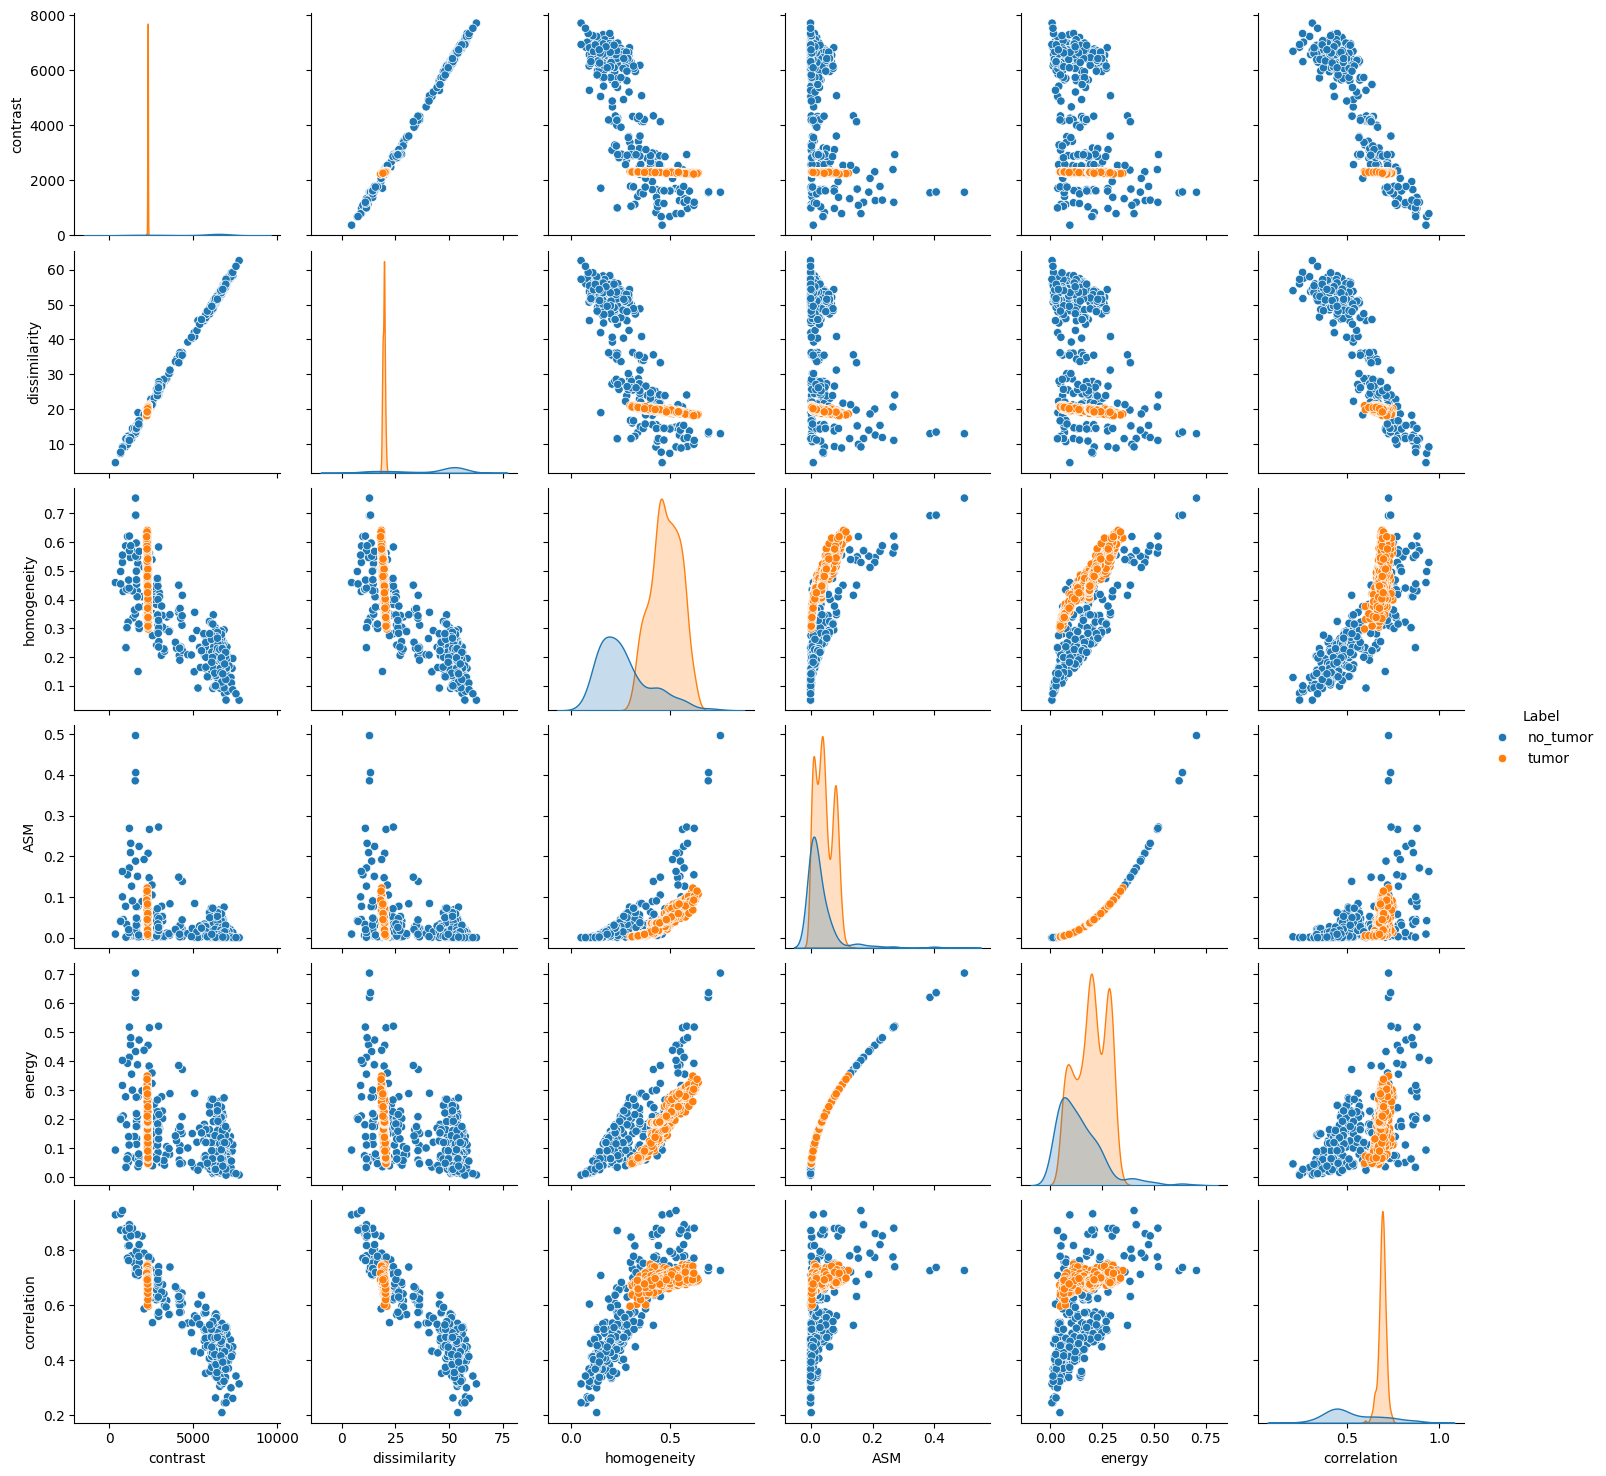

In [37]:
# Pour la visualisation, pairplot coloré par le label
sns.pairplot(df1, hue='Label')
# Définir une graine aléatoire pour la reproductibilité
np.random.seed(0)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=64)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (976, 6)
y_train shape: (976, 1)


In [49]:
dimensions = [X_train.shape[1], 10 , 1]

# Initialiser le réseau de neurones
nn = Reseau_neurone(dimensions)
nn.train(X_train.T, y_train.T, learning_rate=0.01, epochs=200)
accuracy = nn.score(X_test.T, y_test.T)
print(f"Accuracy: {accuracy * 100:.2f}%")

Epoch 0, Loss: 6.171682988506584
Epoch 10, Loss: 6.171682988506584
Epoch 20, Loss: 6.171682988506584
Epoch 30, Loss: 6.171682988506584
Epoch 40, Loss: 6.171682988506584
Epoch 50, Loss: 6.171682988506584
Epoch 60, Loss: 6.171682988506584
Epoch 70, Loss: 6.171682988506584
Epoch 80, Loss: 6.171682988506584
Epoch 90, Loss: 6.171682988506584
Epoch 100, Loss: 6.171682988506584
Epoch 110, Loss: 6.171682988506584
Epoch 120, Loss: 6.171682988506584
Epoch 130, Loss: 6.171682988506584
Epoch 140, Loss: 6.171682988506584
Epoch 150, Loss: 6.171682988506584
Epoch 160, Loss: 6.171682988506584
Epoch 170, Loss: 6.171682988506584
Epoch 180, Loss: 6.171682988506584
Epoch 190, Loss: 6.171682988506584
Accuracy: 72.24%


C:\Users\ayabe\AppData\Local\Temp\ipykernel_4800\1583237179.py:18: RuntimeWarning: overflow encountered in exp
  self.activation['A'+str(i)] = 1 / (1 + np.exp(-self.Z))  # Sigmoid activation


In [50]:
y_pred = nn.predict(X_test.T)
y_pred = y_pred.reshape(-1, 1)

y_pred_labels = label_encoder.inverse_transform(y_pred.flatten())
# Évaluer la précision des prédictions sur l'ensemble de test
accuracy = nn.score(X_test.T, y_test.T)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 72.24%


C:\Users\ayabe\AppData\Local\Temp\ipykernel_4800\1583237179.py:18: RuntimeWarning: overflow encountered in exp
  self.activation['A'+str(i)] = 1 / (1 + np.exp(-self.Z))  # Sigmoid activation
C:\Users\ayabe\AppData\Local\Temp\ipykernel_4800\1583237179.py:18: RuntimeWarning: overflow encountered in exp
  self.activation['A'+str(i)] = 1 / (1 + np.exp(-self.Z))  # Sigmoid activation


In [52]:
# Load the new dataset
df_new = pd.read_excel('brain-tumor-test.xlsx')

# Prepare the feature matrix X_new and label vector y_new (if available)
X_new = np.array(df_new.drop(['Label', 'Image'], axis=1)).T  # Ensure it matches the features of the training set
y_new = np.array(df_new['Label']).reshape(1, df_new['Label'].shape[0])

# Encode labels if necessary (this assumes you used LabelEncoder for y_train)
y_new_encoded = label_encoder.transform(y_new.flatten())  # Encode with the same LabelEncoder as training data
y_new_encoded = y_new_encoded.reshape(1, y_new_encoded.shape[0])  # Ensure the shape is (1, num_samples)

In [55]:
# Apply the same scaler as used during training
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new.T)  # Note: Using X_new.T to fit_transform correctly
X_new_scaled = X_new_scaled.T  # Transpose it back to the correct shape

In [54]:
# Predict using the trained model
y_pred_new = nn.predict(X_new_scaled)

# If you want to evaluate the model's performance on the new dataset:
accuracy_new = accuracy_score(y_new_encoded.flatten(), y_pred_new.flatten())
print(f"Accuracy on new dataset: {accuracy_new * 100:.2f}%")

Accuracy on new dataset: 48.78%
